<a href="https://colab.research.google.com/github/gustavomachin/Linear_Programming_PuLP/blob/master/ProgramacionLinealPuLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programación Lineal con PuLP**

La programación lineal, también conocida como optimización lineal, pertenece al campo de la programación matemática. La programación lineal trata de asignar recursos limitados entre actividades competidoras en la mejor forma posible (óptima). En definitiva, es una metodología que optimiza (maximiza o minimiza) el valor de una función objetivo (lineal o de grado 1), sujeta a restricciones (inecuaciones lineales).
* Función objetivo: es la función lineal que se va a optimizar. Esta función de grado 1 tiene 2 variables (*x* e *y*). Se representa de la siguiente forma:
$f(x,y) = ax+by+c $
* Restricciones: su número depende del problema a resolver, pueden ser dos o más ecuaciones. Se usan inecuaciones lineales.


PuLP es una biblioteca de Python utilizada para modelar y resolver problemas de programación lineal, lo cual incluye soporte para problemas de maximización y minimización sujeto a restricciones.

## Instalamos e importamos la librería 

In [ ]:
! pip install pulp

In [ ]:
from pulp import * #importamos todos los paquetes de la biblioteca

# PROBLEMA DE PRODUCCIÓN

Una fábrica solo produce dos productos: "a" cuya ganancia es de 15 dólares por unidad y "b" con una ganancia de 10 dólares por unidad.

Se requiere y dispone para los productos:

| Producto | Horas hombre | Horas máquina | 
|---------------|---------|-------------------|
|a |20 minutos | 30 minutos|
|b |30 minutos | 10 minutos|
|Restricción |60.000 minutos | 80.000 minutos|

Luego de analizar la demanda del mercado, se concluyó que se venden 3 unidades de "a" por cada 2 de "b".

El beneficio máximo = 15a + 10b

Las restricciones son: 

1. Horas hombre: cada unidad de "a" consume 20 minutos, mientras que "b" 30 minutos, se disponen en total 60.000 minutos.
2. Horas máquina: cada unidad de "a" consume 30 minutos, mientras que "b" 10 minutos, se disponen en total 80.000 minutos.
3. Comportamiento del mercado: se venden 3 de "a" por cada 2 de "b".

Además no se pueden producir cantidades negativas.

Otro supuesto del modelo es que se vende todo lo que se produce (no hay stocks).

## Definimos el modelo

Se contruye el modelo, que busque minimizar (LpMinimize) o maximizar (LpMaximize). En este caso es un problema de maximización de beneficios para la empresa.

In [ ]:
modelo = LpProblem("problema_produccion", sense=LpMaximize)

## Definimos las variables de decisión

Para este problema son la cantidad de producto "a" y "b" a producir. El parámetro `lowBound` indica la cantidad mínima a producir, que en este ejemplo es 0 (no podemos producir cantidades negativas) y no hay cantidad máxima a priori,  por lo cual no usamos el parámetro `upBound`. Por otra parte, el parámetro `cat` representa el tipo de dato, que puede ser entero, continuo o binario; la cantidad a producir es siempre un dato entero.

In [ ]:
#creamos las variables
a = LpVariable("a", lowBound=0, cat="Integer")
b = LpVariable("b", lowBound=0, cat="Integer")

## Definimos la función objetivo

Se formula la función objetivo usando las variables de decisión. La función objetivo refleja el beneficio total obtenido para un valor dado de las variables de decisión, es decir, las cantidades producidas y vendidas (nivel de actividad). En este ejemplo, la ganancia es de 15 por cada unidad de "a" y 10 por cada unidad de "b". 

En términos generales, la función (objetivo) que maximiza el beneficio para la empresa es:


\begin{equation}
max\sum_{i=1}^{n} g_{i}x_{i}
\end{equation}
donde:
* $p_{i}$ : ganancia por cada producto i (i=1, 2,..., n).
* $x_{i}$ : cantidad producida y vendida de cada producto.


In [ ]:
#se agrega la función objetivo al modelo
modelo += 15*a + 10*b 

## Agregamos las restricciones

Las restricciones, así como el objetivo, agregados al modelo también deben estar expresadas en términos de las variables de decisión. Del mismo modo que definimos la función objetivo, aquí usamos el operador de asignación `+=`, de este modo lo que tenemos a la derecha de la expresión matemática se almacena (agrega) en la variable "modelo". Note que a diferencia de la variable objetivo, las restricciones son inecuaciones, es decir, usan operadores lógicos como `<`, `>`, `<=`, `>=`.

Las restricciones:

* a >= 0
* b >= 0
* 20a + 30b <= 60.000
* 30a + 10b <= 80.000
* 3a >= 2b

In [ ]:
#horas hombre
modelo += 20*a + 30*b <= 60000 
#horas máquina
modelo += 30*a + 10*b <= 80000
#comportamiento del mercado 
modelo += 3*a >= 2*b

## Resolvemos el modelo

Una vez definido el modelo, las variables de decisión, función objetivo y restricciones se procede a resolver el modelo usando algún método de optimización como podría ser el método Simplex. Se usa un solver por defecto. De este modo, la mejor solución posible es identificada. `LpStatus` muestra el status de la solución alcanzada, en este caso, la solución alcanzada es la óptima.

In [ ]:
modelo.solve()
print ("Status:", LpStatus[modelo.status])

In [ ]:
print("Producir de a: ", a.varValue)
print("Producir de b: ", b.varValue)

Producir de a:  2571.0
Producir de b:  286.0


La solución que me permite maximizar el beneficio es producir 2571 unidades de "a" y 286 unidades de "b".

In [ ]:
print("Beneficio máximo: ", value(modelo.objective))

Beneficio máximo:  41425.0


El beneficio total obtenido para las cantidades producidas y vendidas es de 41.425 dólares

#PROBLEMA DE TRANSPORTE

Una cervecera artesanal tiene dos almacenes desde los cuales distribuye cerveza a cinco bares. Al comienzo de cada semana, cada bar envía un pedido a la administración de la cervecería por tantas cajas de cerveza, que luego se envían desde el almacén correspondiente al bar. A la cervecería le gustaría saber qué almacén debe suministrar qué bar para minimizar los costos de toda la operación. Suponga que al comienzo de una semana el almacen A tiene 1000 cajas  y 4000 cajas el almacén B (capacidad), y que los bares requieren 500, 900, 1800, 200 y 700 cajas respectivamente (demanda). Gráficamente:

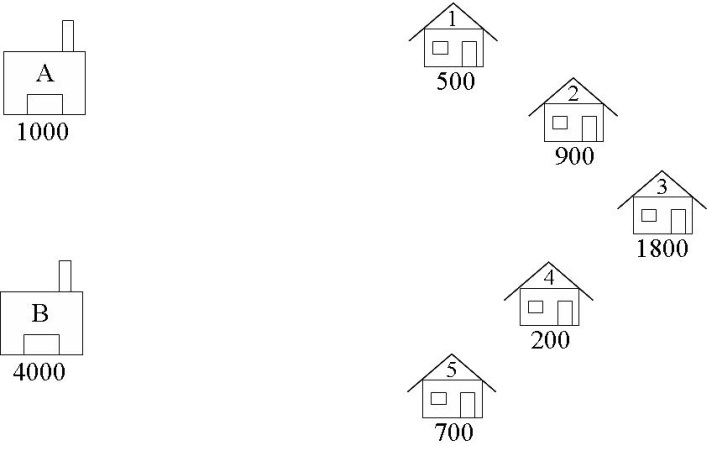

## Definición de los nodos y sus capacidades/demandas

Antes de comenzar el proceso de optimización, debemos crear 2 listas con los nodos de origen (almacenes) y destino (bares) y 2 diccionarios con la cantidad de cajas para cada uno de los nodos (oferta y demanda). Es decir, los nombres de los nodos se colocan en listas y sus capacidades/demandas asociadas se colocan en diccionarios como valores y los nombres de cada uno de los nodos como llaves:

In [ ]:
# Creamos una lista con todos los nodos de origen (almacenes)
almacenes = ['A', 'B']
# Creamos una lista con todos los nodos de destino (bares)
bares = ['1', '2', '3', '4', '5']
# Creamos un diccionario con el número de unidades disponibles para cada almacen
oferta = {
    'A': 1000, 
    'B': 4000
}
# Creamos un diccionario con el número de unidades demandadas por cada bar 
demanda = {
    '1': 500,
    '2': 900,
    '3': 1800,
    '4': 200,
    '5': 700,
}

##Definimos el costo de transporte por caja desde los nodos de origen a los de destino


| Desde el almacen al bar | 1 | 2 | 3 | 4 | 5 |  
|-------------------------|---|---|---|---|---|
|A                        |2  | 4 | 5 | 2 | 1 |
|B                        |3  | 1 | 3 | 2 | 3 |


Por ejemplo, el costo de transportar una caja del almacen A al bar 1 es de 2 dólares, mientras que transportarla desde el almacen B es de 3 dólares.

In [ ]:
# Creamos un diccionario que incluya la ruta y el costo de transporte.
costo_envio = {
    'A':{'1':2, '2':4, '3':5, '4':2, '5':1},
    'B':{'1':3, '2':1, '3':3, '4':2, '5':3},      
}

## Definimos el modelo

Se construye el modelo que busque minimizar (LpMinimize) el costo de transporte. 

In [ ]:
# Creamos la variable modelo
modelo = LpProblem("problema_transporte", sense = LpMinimize)

## Definimos las variables de decisión

En un problema de transporte debemos decidir cuántos bienes transportar desde los nodos de origen hasta los nodos de destino. Las variables de decisión en este caso es la cantidad de cajas de cerveza que se transportarán de cada almacén a cada bar. Resultan 15 variables de decisión. Por ejemplo:

*   A1 = número de cajas de cerveza que se transportarán desde el almacén A hasta el Bar 1.
* ...
*   A5 = número de cajas de cerveza que se transportarán desde el almacén A hasta el Bar 5.
*   B1 = número de cajas de cerveza que se transportarán desde el almacén B hasta el Bar 1.
* ...
*   B5 = número de cajas de cerveza que se transportarán desde el almacén B hasta el Bar 5.



In [ ]:
# Creamos una lista de tuplas que contienen todas las posibles rutas de transporte.
# Usamos una list comprehension
rutas = [(a, b) for a in almacenes for b in bares]

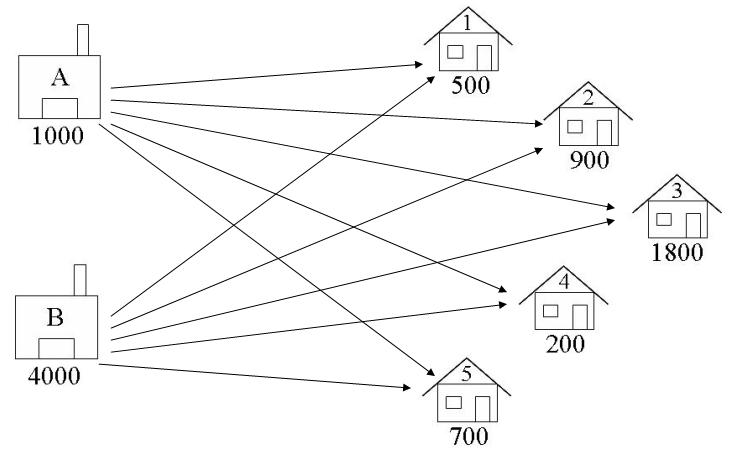

In [ ]:
# Un diccionario llamado "cantidad" es creado para contener las variables 
cantidad = LpVariable.dicts("Cantidad enviada", (almacenes, bares), lowBound=0, cat="Integer")

El parámetro `lowBound` de las variables es 0, mientras que el tipo de dato debe ser entero, es decir, el número de cajas no puede ser negativo ni fracción. No hay `upBound`.

##Definimos la función objetivo

La función objetivo en un problema de transporte está vinculada al costo. El costo del transporte desde el almacén hasta el bar debe ser una función lineal de las cantidades de cajas transportadas. Sin embargo, debido a factores como economías de escala o costos fijos, no simpre es el caso. Supondremos, para el presente trabajo que existe un costo fijo en dólares de transporte por caja.

El costo mínimo de transporte sería va estar en función la cantidad de cajas transportadas (variables de decisión) y el costo de transporte por caja desde los nodos de origen a los de destino. 

El costo mínimo de transporte = costo por caja para la ruta A1 * A1 (número de cajas en la ruta A1) + … + costo por caja para ruta B5 * B5 (número de cajas en ruta B5)

En términos generales, la función (objetivo) que minimiza el costo de transporte es:

\begin{equation}
min\sum_{i=1}^{m}\sum_{j=1}^{n} c_{ij}x_{ij}
\end{equation}
donde:
* $c_{ij}$ : costo de transportar una unidad de producto desde el origen i (i=1, 2,..., m) hasta el destino j (j=1, 2,..., n).
* $x_{ij}$ : cantidad transportada de producto desde el origen i hasta el destino j.

In [ ]:
# Se agrega la función objetivo al modelo usando una list comprehension
modelo += lpSum([cantidad[a][b] * costo_envio[a][b] for (a, b) in rutas])

##Agregamos las restricciones

Las restricciones surgen de la oferta y demanda. La capacidad de suministro del almacén A es de 1000 cajas, por lo tanto, la cantidad total de cajas enviadas desde el almacén A no puede exceder esa cantidad. De igual manera, la cantidad de cajas enviadas desde el almacén B no puede exceder las 4000 unidades.

*   A1 + A2 + A3 + A4 + A5 <= 1000
*   B1 + B2 + B3 + B4 + B5 <= 4000

La demanda de cerveza en el bar 1 es de 500 cajas, por lo que la cantidad de cerveza entregada allí debe ser de al menos 500 para evitar la pérdida de ventas. De igual forma, la demanda en el bar 2 es de 900 cajas, en el bar 3 de 1800 cajas, en el bar 4 de 200 cajas y en el bar 5 de 700 cajas. Tenga en cuenta que asumimos que no hay sanciones por el exceso de suministro de bares (aparte del costo adicional de transporte en el que incurrimos).

* A1 + B1 >= 500
* A2 + B2 >= 900
* A3 + B3 >= 1800
* A4 + B4 >= 200
* A5 + B5 >= 700




Las restricciones de oferta y demanda son agregadas usando un bucle for y una list comprehension en su interior

In [ ]:
# Las restricciones de la oferta son agregadas al modelo por cada nodo de origen (almacen)
for a in almacenes:
    modelo += lpSum([cantidad[a][b] for b in bares]) <= oferta[a]

# Las restricciones de la demanda son agregadas al modelo por cada nodo de destino (bares)
for b in bares:
    modelo += lpSum([cantidad[a][b] for a in almacenes]) >= demanda[b]

##Resolvemos el modelo

El modelo de transporte es resuelto e imprimimos el status de la solución.

In [ ]:
modelo.solve()
print ("Status:", LpStatus[modelo.status])

Status: Optimal


La solución alcanzada con el modelo es óptima.

In [ ]:
# Usando un bucle for cada variable es impresa con su valor óptimo
for v in modelo.variables():
    print (v.name, "=", v.varValue)

Cantidad_enviada_A_1 = 300.0
Cantidad_enviada_A_2 = 0.0
Cantidad_enviada_A_3 = 0.0
Cantidad_enviada_A_4 = 0.0
Cantidad_enviada_A_5 = 700.0
Cantidad_enviada_B_1 = 200.0
Cantidad_enviada_B_2 = 900.0
Cantidad_enviada_B_3 = 1800.0
Cantidad_enviada_B_4 = 200.0
Cantidad_enviada_B_5 = 0.0


La solución que me permite minimizar el costo de transporte es enviar: 300 cajas de cerveza desde el almacén A hasta el Bar 1 (ruta A1), 700 cajas de  desde el almacén A hasta el Bar 5 (ruta A5), 200 cajas de cerveza desde el almacén B hasta el Bar 1 (ruta B1), 900 cajas de cerveza desde el almacén B hasta el Bar 2 (ruta B2), 1800 cajas de cerveza desde el almacén B hasta el Bar 3 (ruta B3) y 200 cajas de cerveza desde el almacén B hasta el Bar 4 (ruta B4). De este modo se satisfacen las demandas de los bares a la vez que se minimiza el costo de todo la operación logística.

Imprimirmos en pantalla la función objetivo optimizada con las cantidades enviadas (variables de decisión).

In [ ]:
  print ("Costo de transporte mínimo: ", value(modelo.objective))

Costo de transporte mínimo:  8600.0


El costo mínimo de transporte para las cantidades enviadas es de 8.600 dólares.